#Resize,grayscale conversion ,Image Cropping,Image Rotation

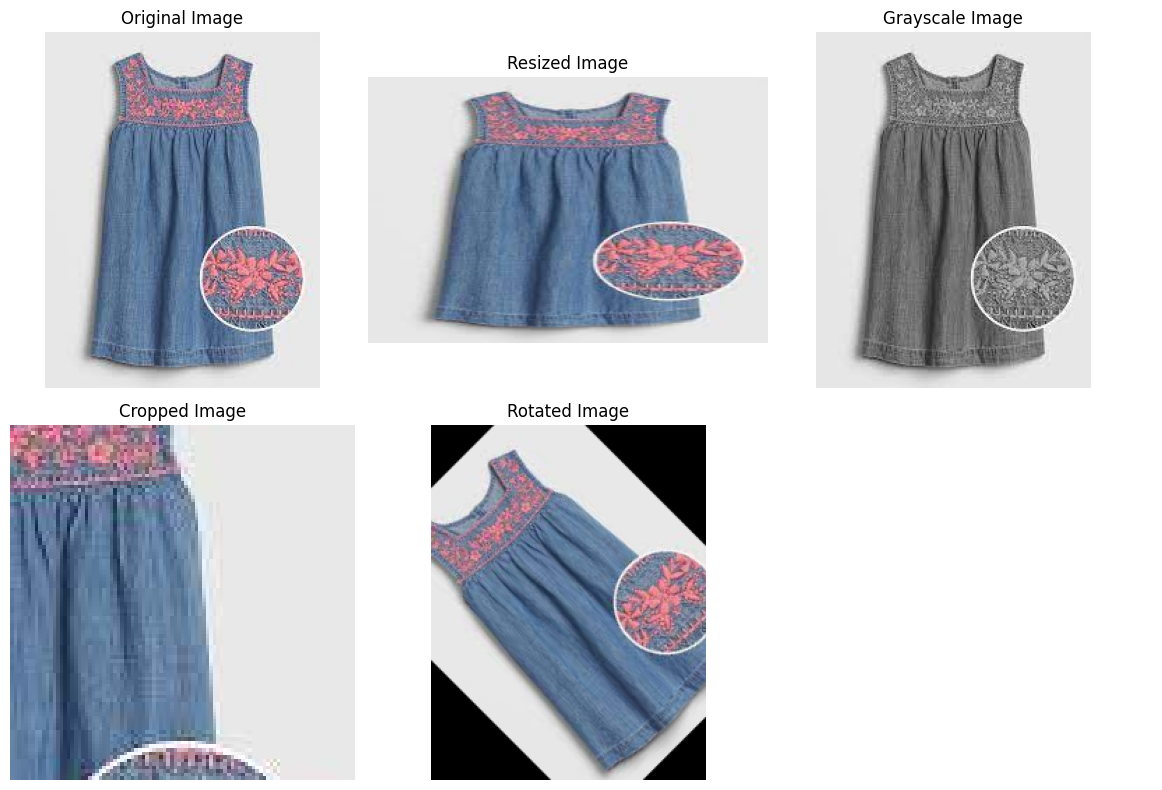

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('image1.jpg')

# Resize the image
width = 300
height = 200
resized_image = cv2.resize(image, (width, height))

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Cropping the image
start_row, end_row = 50, 150
start_col, end_col = 100, 200
cropped_image = image[start_row:end_row, start_col:end_col]

# Image rotation
angle = 45
rows, cols = image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

# Display the images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Original Image
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Resized Image
axes[0, 1].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
axes[0, 1].set_title('Resized Image')
axes[0, 1].axis('off')

# Grayscale Image
axes[0, 2].imshow(gray_image, cmap='gray')
axes[0, 2].set_title('Grayscale Image')
axes[0, 2].axis('off')

# Cropped Image
axes[1, 0].imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Cropped Image')
axes[1, 0].axis('off')

# Rotated Image
axes[1, 1].imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
axes[1, 1].set_title('Rotated Image')
axes[1, 1].axis('off')

# Hide the empty subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


Test similarity analysis 
perform text preprocessing on review text column, including tokenization removing stopwords, punctuation,and special characters, and converting text to lowercase.

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string



# Sample DataFrame with a column 'Review text'
data = pd.read_csv('WomensClothingE-CommerceReviews.csv')
df = pd.DataFrame(data)

# Function to preprocess text
def preprocess_text(text):
    if pd.isnull(text):  # Check if text is NaN
        return ''  # Return empty string for NaN values

    # Tokenization
    tokens = word_tokenize(text.lower())

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in punctuation]

    # Join tokens back into a string
    preprocessed_text = ' '.join(filtered_tokens)

    return preprocessed_text

# Apply preprocessing to 'Review Text' column
df['preprocessed_review'] = df['Review Text'].apply(preprocess_text)

# Display the DataFrame with preprocessed reviews
print(df)


       Age                                              Title  \
0       33                                                NaN   
1       34                                                NaN   
2       60                            Some major design flaws   
3       50                                   My favorite buy!   
4       47                                   Flattering shirt   
...    ...                                                ...   
23481   34                     Great dress for many occasions   
23482   48                         Wish it was made of cotton   
23483   31                              Cute, but see through   
23484   28  Very cute dress, perfect for summer parties an...   
23485   52                    Please make more like this one!   

                                             Review Text  Rating  \
0      Absolutely wonderful - silky and sexy and comf...       4   
1      Love this dress!  it's sooo pretty.  i happene...       5   
2      I had su

implement stemming or lemmatization to further normalize the text data

In [7]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

# Download NLTK resources (if not already downloaded)
# nltk.download('punkt')
# nltk.download('stopwords')

# Sample DataFrame with a column 'review_text'
data = pd.read_csv('WomensClothingE-CommerceReviews.csv')
df = pd.DataFrame(data)

# Initialize Porter Stemmer
stemmer = PorterStemmer()

# Function to preprocess text with stemming
def preprocess_text_with_stemming(text):
    if pd.isnull(text):  # Check if text is NaN
        return ''  # Return empty string for NaN values

    # Tokenization
    tokens = word_tokenize(text.lower())

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    punctuation = set(string.punctuation)
    filtered_tokens = [token for token in tokens if token not in stop_words and token not in punctuation]

    # Stemming
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]

    # Join tokens back into a string
    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text

# Apply preprocessing with stemming to 'Review Text' column
df['preprocessed_review_stemming'] = df['Review Text'].apply(preprocess_text_with_stemming)

# Display the DataFrame with preprocessed reviews
print(df[['Review Text', 'preprocessed_review_stemming']])


                                             Review Text  \
0      Absolutely wonderful - silky and sexy and comf...   
1      Love this dress!  it's sooo pretty.  i happene...   
2      I had such high hopes for this dress and reall...   
3      I love, love, love this jumpsuit. it's fun, fl...   
4      This shirt is very flattering to all due to th...   
...                                                  ...   
23481  I was very happy to snag this dress at such a ...   
23482  It reminds me of maternity clothes. soft, stre...   
23483  This fit well, but the top was very see throug...   
23484  I bought this dress for a wedding i have this ...   
23485  This dress in a lovely platinum is feminine an...   

                            preprocessed_review_stemming  
0                      absolut wonder silki sexi comfort  
1      love dress 's sooo pretti happen find store 'm...  
2      high hope dress realli want work initi order p...  
3      love love love jumpsuit 's fun flirt

using cosine similarity or jaccard similarity, implementing a text similarity analysis to identify similar reviews within dataset for General,General Petite, and intimates from the Division Name column

In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Sample DataFrame with a column 'Review Text' and 'Division Name'
data = pd.read_csv('WomensClothingE-CommerceReviews.csv')
df = pd.DataFrame(data)

# Function to preprocess text
def preprocess_text(text):
    if pd.isnull(text):  # Check if text is NaN
        return ''  # Return empty string for NaN values

    # Tokenization
    tokens = word_tokenize(text.lower())

    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Join tokens back into a string
    preprocessed_text = ' '.join(filtered_tokens)

    return preprocessed_text

# Apply text preprocessing to 'Review Text' column
df['preprocessed_review'] = df['Review Text'].apply(preprocess_text)

# Select reviews for General, General Petite, and Intimates divisions
general_reviews = df[df['Division Name'] == 'General']['preprocessed_review'].tolist()
general_petite_reviews = df[df['Division Name'] == 'General Petite']['preprocessed_review'].tolist()
intimates_reviews = df[df['Division Name'] == 'Intimates']['preprocessed_review'].tolist()

# Function to compute cosine similarity between two lists of reviews
def compute_cosine_similarity(reviews1, reviews2):
    # Combine the two sets of reviews
    all_reviews = reviews1 + reviews2

    # Compute TF-IDF vectors
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(all_reviews)

    # Compute cosine similarity matrix
    similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

    # Extract similarity scores between sets of reviews
    similarity_scores = similarity_matrix[:len(reviews1), len(reviews1):]

    return similarity_scores

# Compute cosine similarity between General and General Petite reviews
general_general_petite_similarity = compute_cosine_similarity(general_reviews, general_petite_reviews)

# Compute cosine similarity between General and Intimates reviews
general_intimates_similarity = compute_cosine_similarity(general_reviews, intimates_reviews)

# Compute cosine similarity between General Petite and Intimates reviews
general_petite_intimates_similarity = compute_cosine_similarity(general_petite_reviews, intimates_reviews)

# Display the similarity scores
print("Cosine Similarity between General and General Petite:")
print(general_general_petite_similarity)
print("\nCosine Similarity between General and Intimates:")
print(general_intimates_similarity)
print("\nCosine Similarity between General Petite and Intimates:")
print(type(general_petite_intimates_similarity))


Cosine Similarity between General and General Petite:
[[0.05678296 0.0466997  0.05006207 ... 0.         0.21930906 0.01139956]
 [0.         0.01719417 0.03172469 ... 0.07113966 0.01721651 0.00786738]
 [0.06329677 0.         0.0125273  ... 0.05573591 0.03120383 0.01990486]
 ...
 [0.03519182 0.00710475 0.02023539 ... 0.0703101  0.         0.01412999]
 [0.         0.01486435 0.06164544 ... 0.01446134 0.07573498 0.045523  ]
 [0.02608794 0.003684   0.02087683 ... 0.04275104 0.01158809 0.07449492]]

Cosine Similarity between General and Intimates:
[]

Cosine Similarity between General Petite and Intimates:
<class 'numpy.ndarray'>


3D PLOT VISUALIZATION


In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [11]:
df = pd.read_csv('WomensClothingE-CommerceReviews.csv', header=0,index_col=0)
df.head()

,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
Age,,,,,,,,
33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [12]:
df.describe()

,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000
mean,4.196032,0.822362,2.535936
std,1.110031,0.382216,5.702202
min,1.000000,0.000000,0.000000
25%,4.000000,1.000000,0.000000
50%,5.000000,1.000000,1.000000
75%,5.000000,1.000000,3.000000
max,5.000000,1.000000,122.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23486 entries, 33 to 52
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Title                    19676 non-null  object
 1   Review Text              22641 non-null  object
 2   Rating                   23486 non-null  int64 
 3   Recommended IND          23486 non-null  int64 
 4   Positive Feedback Count  23486 non-null  int64 
 5   Division Name            23472 non-null  object
 6   Department Name          23472 non-null  object
 7   Class Name               23472 non-null  object
dtypes: int64(3), object(5)
memory usage: 1.6+ MB


create a 3d barplot to visualize relationship between age, Rating and positive feedBack Count Columns

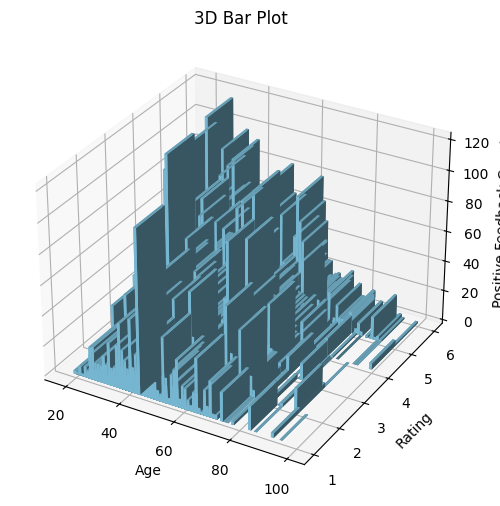

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
# Load the CSV file into a DataFrame
df = pd.read_csv('WomensClothingE-CommerceReviews.csv')

# Create 3D bar plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

x = df['Age']
y = df['Rating']
z = np.zeros_like(x)
dx = dy = 1
dz = df['Positive Feedback Count']

ax.bar3d(x, y, z, dx, dy, dz, color='skyblue')

ax.set_xlabel('Age')
ax.set_ylabel('Rating')
ax.set_zlabel('Positive Feedback Count')
ax.set_title('3D Bar Plot')

plt.show()
